In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [129]:
scans = pd.read_csv('/home/brian/car/lidar/lidar_gui/Debug/recording.csv');
scans['radians'] = scans.degrees * math.pi/180.
scans['x_meters'] = scans.distance_meters*np.cos(scans.radians)
scans['y_meters'] = scans.distance_meters*np.sin(scans.radians)

In [172]:
first_scan = min(scans.scan_number)
last_scan = max(scans.scan_number)

In [173]:
def get_scan(n):
    s = scans[scans.scan_number == scan_number]
    return s
scan1 = get_scan(first_scan)

In [174]:

scan1.describe()

,scan_number,degrees,distance_meters,signal_strength,radians,x_meters,y_meters
count,360.0,360.000000,208.000000,208.000000,360.000000,208.000000,208.000000
mean,59.0,179.500000,0.952404,227.740385,3.132866,-0.213057,0.300655
std,0.0,104.067286,0.553170,127.127688,1.816317,0.682845,0.784048
min,59.0,0.000000,0.218000,6.000000,0.000000,-1.242740,-3.092896
25%,59.0,89.750000,0.502000,166.000000,1.566433,-0.749410,-0.240784
50%,59.0,179.500000,0.986000,222.000000,3.132866,-0.255346,0.203078
75%,59.0,269.250000,1.116000,256.250000,4.699299,0.288182,0.857762
max,59.0,359.000000,4.021000,928.000000,6.265732,2.583410,3.124904


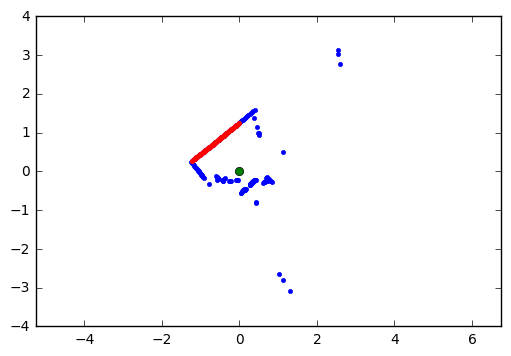

In [120]:
def plot_scan(scan):
    plt.axis('equal')
    plt.plot(scan.x_meters,scan.y_meters,'b.')
    plt.plot(0,0,'go')
    plt.plot(scan.x_meters[90:169],scan.y_meters[90:169],'r.')
    
plot_scan(scan1)


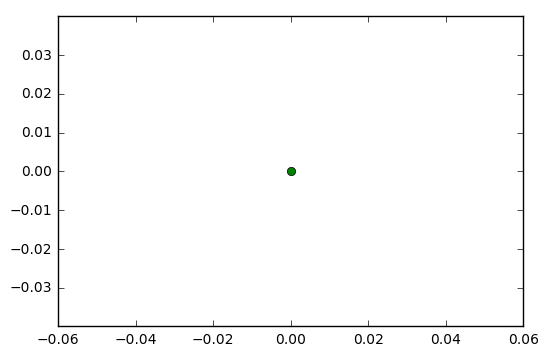

In [126]:
s5 = get_scan(1)
plot_scan(s5)

In [10]:
def normalize(h):
    return (float(h[0])/float(h[2]),float(h[1])/float(h[2]),1.)


In [11]:
def distance_point_to_line(p,l):
    return np.abs(np.dot(normalize(l),normalize(p)))

In [94]:
def has_nulls(x):
    x = np.array(x)
    return not np.all(np.isnan(x)==False)

In [88]:
# returns true if all points in x,y are along the same line
# Homeogeneous math here:
#    http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/BEARDSLEY/node2.html
def is_line(x,y,tolerance=0.01):
    x=np.array(x)
    y=np.array(y)
    
    if has_nulls(x) or has_nulls(y): 
        return False
    
    # make homogeneous points out of x and y vectors
    points = [(x[i],y[i],1.) for i in range(len(x))]
    line = np.cross(points[0],points[-1])
    for p in points:
        d = distance_point_to_line(p,line)
        if d > tolerance:
            return False
    return True

    

In [80]:
v =  np.array([1,4,3])
np.all(np.isnan(v) == False)

True

In [81]:
x=[1 ,np.nan, 3]
y=[1, 1.1, 1]
is_line(x, y, tolerance=0.2)

False

In [110]:
# returns tuples of indexes of endpoints of all lines
# start at an index
# go ccw while still a line
# go cw while still a line
def find_lines(x,y,tolerance=0.02):
    found_lines = []
    start = 0
    while start < len(x):
        line_end = None
        for end in range(start+5, len(x)):
            if is_line(x[start:end],y[start:end],tolerance):
                line_end = end
            else:
                break
        if line_end is not None:
            found_lines.append((start,line_end))
            start = line_end + 1
        else:
            start += 1
    return found_lines

print(find_lines(scan1.x_meters, scan1.y_meters))



[(76, 170), (171, 191), (192, 198), (278, 287), (307, 327), (328, 334), (335, 340)]


In [146]:
def plot_scan(scan):
    plt.axis('equal')
    plt.plot(scan.x_meters,scan.y_meters,'b.')
    plt.plot(0,0,'go')
    colors = ['r','g','k']
    for i,line in enumerate(find_lines(scan.x_meters, scan.y_meters,0.02)):
        plt.plot(scan.x_meters[line[0]:line[1]],scan.y_meters[line[0]:line[1]], colors[i%len(colors)]+'.')

In [169]:
min(scans.scan_number)

59

In [170]:
max(scans.scan_number)

124

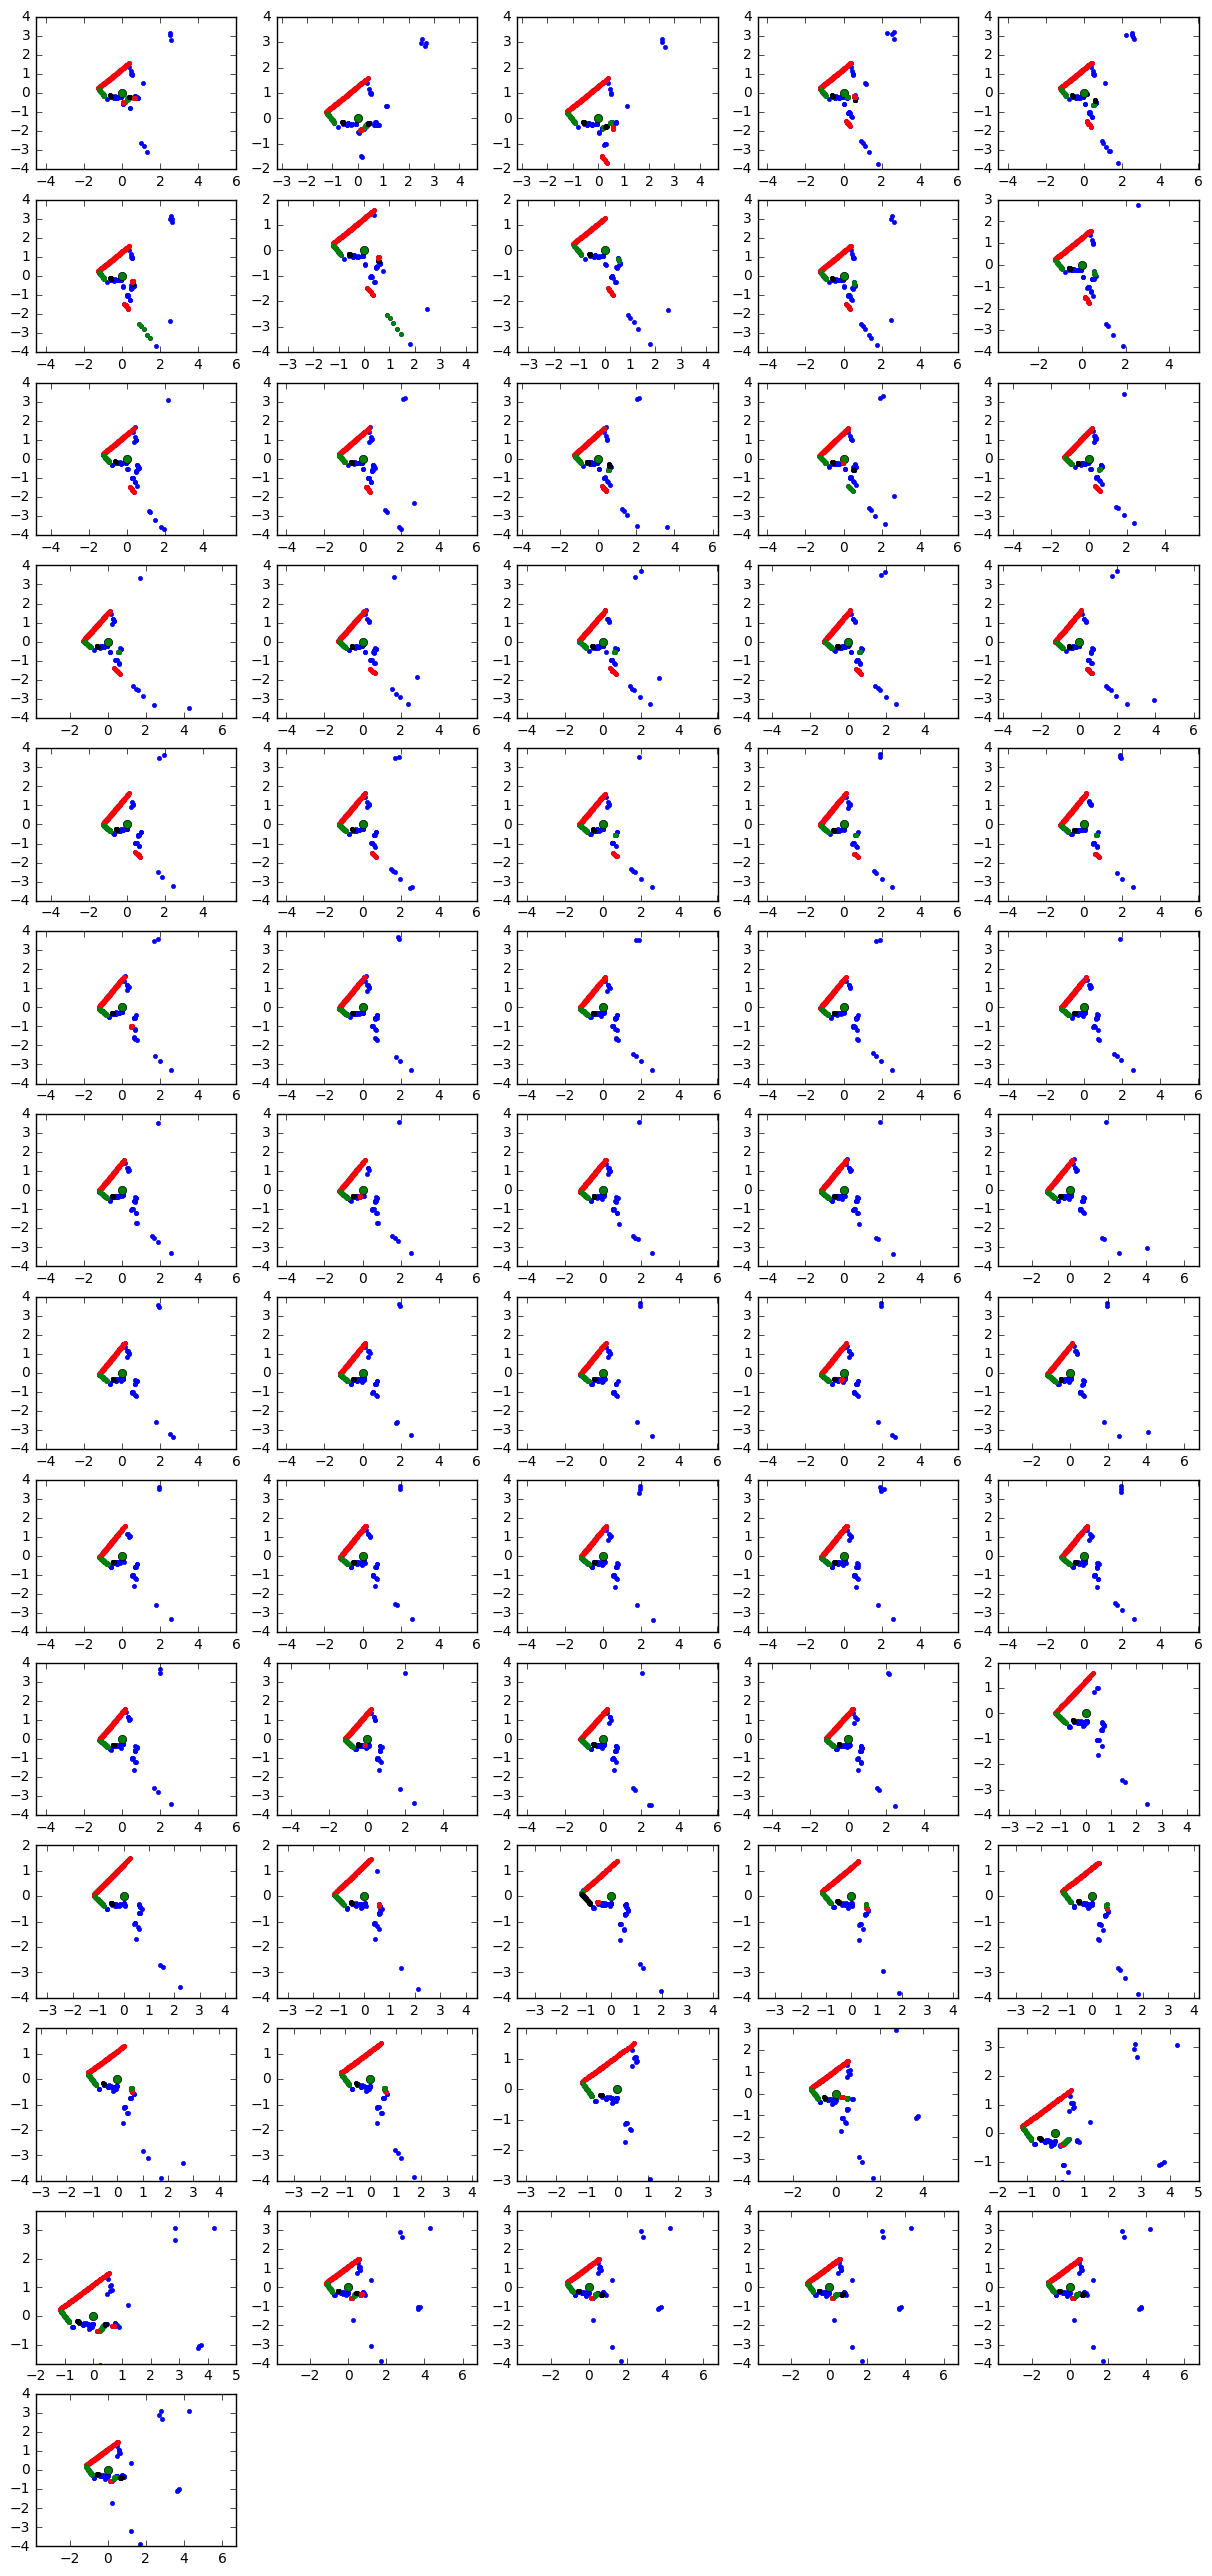

In [185]:
fig=plt.figure()
fig.set_size_inches(15,35)
for i,scan_number in enumerate(range(first_scan,last_scan+1)):
    plt.subplot(15,5,i+1)
    plot_scan(get_scan(scan_number))

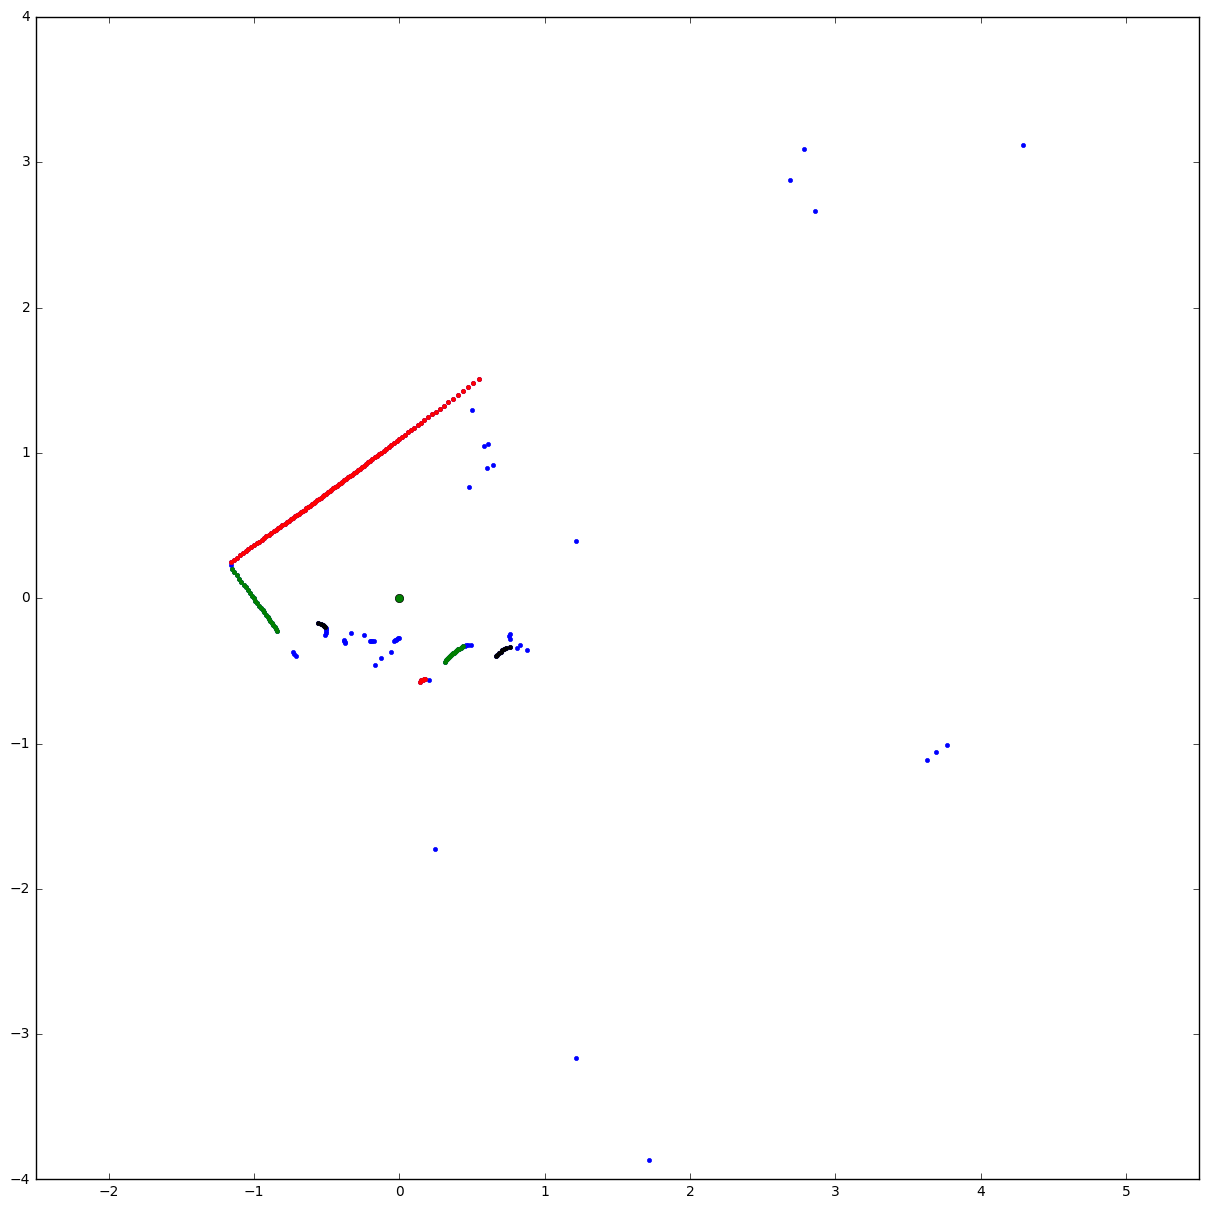

In [187]:
plt.figure().set_size_inches(15,15)
plot_scan(get_scan(1))

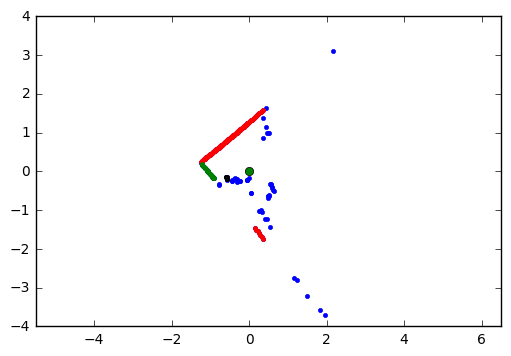

In [161]:
plot_scan(get_scan(10))

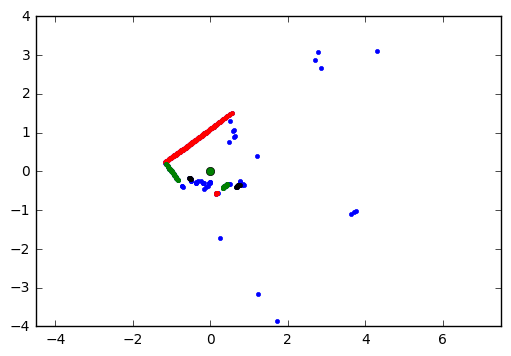

In [168]:
plot_scan(get_scan(65))